# **Mini Project 3 - Clustering**

In [ ]:
# in case of missing libraries
!pip install umap-learn
!pip install s-dbw

In [ ]:
# # in case of missing libraries
# !pip install pandas
# !pip install sklearn
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install warnings

import libraries

In [ ]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import umap
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from s_dbw import SD
import warnings
warnings.filterwarnings("ignore")

## **Data processing and exploration**

Import features from 'features.txt'

In [ ]:
# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

In [ ]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

Get train, test data

In [ ]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]

X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)

Since we will perform clustering we don't need to split the data into train and test, so we can merge it together:

In [ ]:
X = pd.concat([X_train, X_test], ignore_index=True)

Dataset looks like this:

In [ ]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


We also merge y target value which will be used only for visualization

In [ ]:
y = pd.concat([y_train, y_test], ignore_index=True)

In [ ]:
y

0        5
1        5
2        5
3        5
4        5
        ..
10294    2
10295    2
10296    2
10297    2
10298    2
Name: Activity, Length: 10299, dtype: int64

And check for any missing values or duplicates:

In [ ]:
X.duplicated().sum()

0

In [ ]:
X.isnull().values.sum()

0

The data is normilized in [-1, 1] ranges:

In [ ]:
X.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's see how many classes there are in the dataset:

In [ ]:
y.unique()

array([5, 4, 6, 1, 3, 2])

In [ ]:
y = y.replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5})

And at the classes distribution:

In [ ]:
y.value_counts()

5    1944
4    1906
3    1777
0    1722
1    1544
2    1406
Name: Activity, dtype: int64

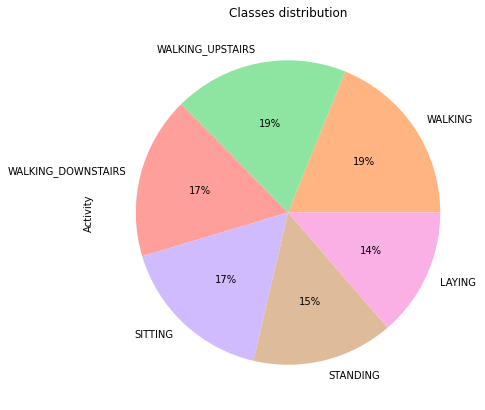

In [ ]:
fig = plt.figure(figsize=(7,7))
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
colors = sns.color_palette('pastel')[1:7]
y.value_counts(normalize=True).plot.pie(labels = labels, colors = colors, autopct='%.0f%%').set(title='Classes distribution')
plt.show()

Let's visualise classes:

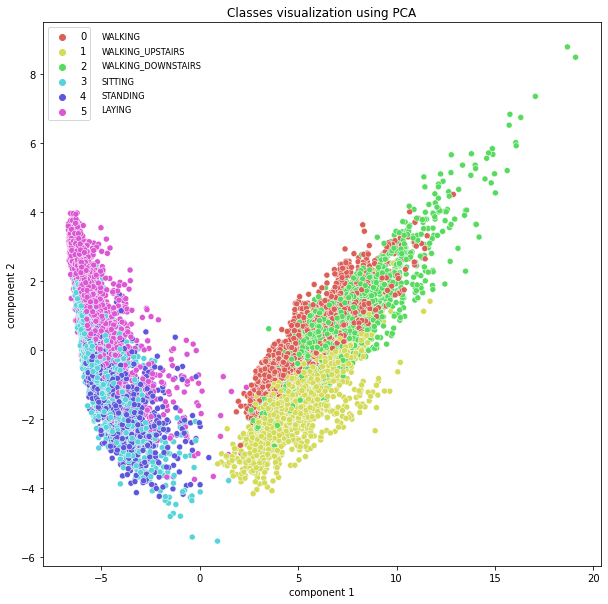

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
df = pd.DataFrame()
df["y"] = y
df["component 1"] = principalDf['principal component 1']
df["component 2"] = principalDf['principal component 2']
n = len(y.unique())

fig = plt.figure(figsize=(10,10))
graph = sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Classes visualization using PCA")

plt.text(-5, 9, 'WALKING', horizontalalignment='left', size='small', color='black')
plt.text(-5, 8.6, 'WALKING_UPSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(-5, 8.2, 'WALKING_DOWNSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(-5, 7.7, 'SITTING', horizontalalignment='left', size='small', color='black')
plt.text(-5, 7.3, 'STANDING', horizontalalignment='left', size='small', color='black')
plt.text(-5, 6.9, 'LAYING', horizontalalignment='left', size='small', color='black')
plt.show(graph) 

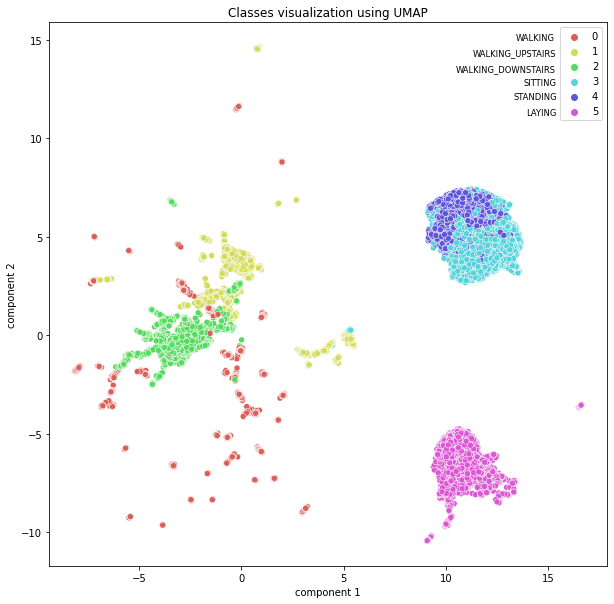

In [ ]:
df = pd.DataFrame()
df["y"] = y
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)
df["component 1"] = embedding[:,0]
df["component 2"] = embedding[:,1]

fig = plt.figure(figsize=(10,10))
graph = sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Classes visualization using UMAP") 
plt.text(13.4, 15, 'WALKING', horizontalalignment='left', size='small', color='black')
plt.text(11.3, 14.2, 'WALKING_UPSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(10.5, 13.4, 'WALKING_DOWNSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(13.8, 12.7, 'SITTING', horizontalalignment='left', size='small', color='black')
plt.text(13.3, 12, 'STANDING', horizontalalignment='left', size='small', color='black')
plt.text(13.9, 11.2, 'LAYING', horizontalalignment='left', size='small', color='black')
plt.show(graph)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.006s...
[t-SNE] Computed neighbors for 10299 samples in 4.218s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.305718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.207626
[t-SNE] KL 

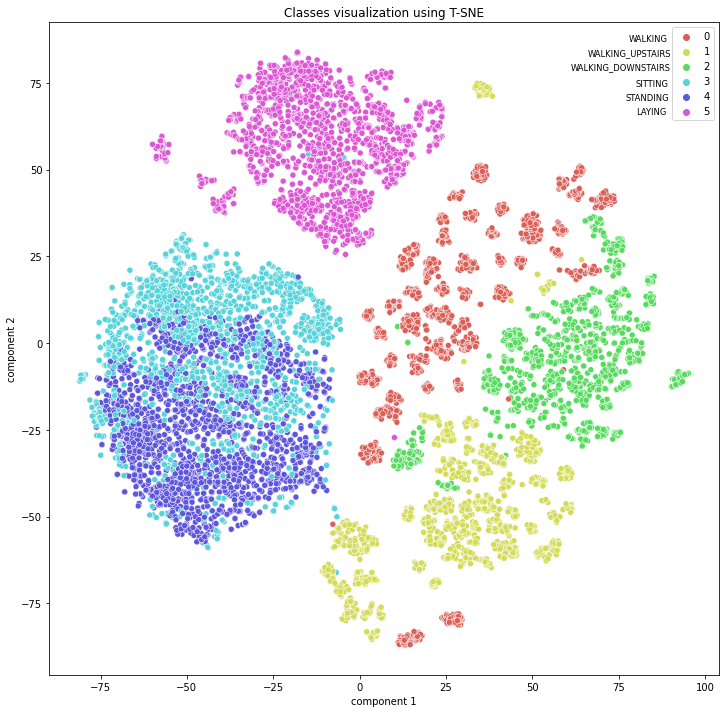

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = y
df["component 1"] = z[:,0]
df["component 2"] = z[:,1]
n = len(y.unique())

fig = plt.figure(figsize=(12,12))
graph = sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Classes visualization using T-SNE") 
plt.text(78, 87, 'WALKING', horizontalalignment='left', size='small', color='black')
plt.text(66, 83, 'WALKING_UPSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(61, 79, 'WALKING_DOWNSTAIRS', horizontalalignment='left', size='small', color='black')
plt.text(80, 74, 'SITTING', horizontalalignment='left', size='small', color='black')
plt.text(77, 70, 'STANDING', horizontalalignment='left', size='small', color='black')
plt.text(80, 66, 'LAYING', horizontalalignment='left', size='small', color='black')
plt.show(graph)

It is visible that not all of the classes are visially separable

Let's see how clustering algorithm DBSCAN will perform

## **Clustering**

To select epsilon based on number of min samples we perform nearest neighbors distances calculation and then select a value that is on the curve on the graph

Number of min samples is usually chosen based on the domain knowledge

We know that the number of instances is high so the number of min samples should also be big

If we perform curve calculation for a few different number of min samples, we will see that ranges of epsilon don't change. It is always around 4

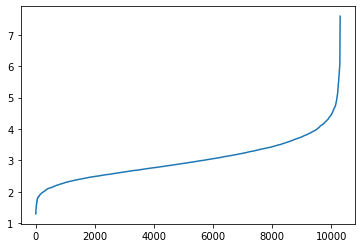

In [ ]:
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

So in order to find the best number of samples we will calculate davies bouldin and S_Dbw scores

In [ ]:
# change to numpy in order to input into score calculation functions
x = X.to_numpy()

In [ ]:
DBSCAN_cluster = DBSCAN(eps=4, min_samples=20).fit(X)
y_pred = DBSCAN_cluster.fit_predict(X)
d_b_score = davies_bouldin_score(x, y_pred)
s_dbw_score = SD(x, y_pred, metric='euclidean')

print (" Min number of samples", 20)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score, "\n S_Dbw score: ", s_dbw_score)
print(" Classes: ", np.unique(DBSCAN_cluster.labels_))
unique, counts = np.unique(y_pred, return_counts=True)
print(" Classes counts: ", counts)

 Min number of samples 20
 Lower is better
 Davies bouldin score:  2.7587753160288893 
 S_Dbw score:  0.9011165336602653
 Classes:  [-1  0  1  2  3  4  5]
 Classes counts:  [2682 4903 2586   37   40   28   23]


In [ ]:
DBSCAN_cluster = DBSCAN(eps=4, min_samples=40).fit(X)
y_pred = DBSCAN_cluster.fit_predict(X)
d_b_score = davies_bouldin_score(x, y_pred)
s_dbw_score = SD(x, y_pred, metric='euclidean')

print (" Min number of samples", 40)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score, "\n S_Dbw score: ", s_dbw_score)
print(" Classes: ", np.unique(DBSCAN_cluster.labels_))
unique, counts = np.unique(y_pred, return_counts=True)
print(" Classes counts: ", counts)

 Min number of samples 40
 Lower is better
 Davies bouldin score:  4.313984678452097 
 S_Dbw score:  1.1161290707557507
 Classes:  [-1  0  1]
 Classes counts:  [3465 4814 2020]


In [ ]:
DBSCAN_cluster = DBSCAN(eps=4, min_samples=100).fit(X)
y_pred = DBSCAN_cluster.fit_predict(X)
d_b_score = davies_bouldin_score(x, y_pred)
s_dbw_score = SD(x, y_pred, metric='euclidean')

print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score, "\n S_Dbw score: ", s_dbw_score)
print(" Classes: ", np.unique(DBSCAN_cluster.labels_))
unique, counts = np.unique(y_pred, return_counts=True)
print(" Classes counts: ", counts)

 Min number of samples 100
 Lower is better
 Davies bouldin score:  4.135284544393525 
 S_Dbw score:  1.0837876904573986
 Classes:  [-1  0  1]
 Classes counts:  [4714 4642  943]


In [ ]:
DBSCAN_cluster = DBSCAN(eps=4, min_samples=500).fit(X)
y_pred = DBSCAN_cluster.fit_predict(X)
d_b_score = davies_bouldin_score(x, y_pred)
s_dbw_score = SD(x, y_pred, metric='euclidean')

print (" Min number of samples", 500)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score, "\n S_Dbw score: ", s_dbw_score)
print(" Classes: ", np.unique(DBSCAN_cluster.labels_))
unique, counts = np.unique(y_pred, return_counts=True)
print(" Classes counts: ", counts)

 Min number of samples 500
 Lower is better
 Davies bouldin score:  1.236036676870507 
 S_Dbw score:  0.942903141760135
 Classes:  [-1  0]
 Classes counts:  [6726 3573]


We can see that the best two numbers of min samples were 20 and 40, making this number bigger resulted in bigger number of outliers (class -1)

### **Cluster visualization**

Let's compare these two models by visualizing resulting classes:

In [ ]:
DBSCAN_cluster_20 = DBSCAN(eps=4, min_samples=20).fit(X)
y_pred_20 = DBSCAN_cluster_20.fit_predict(X)

In [ ]:
DBSCAN_cluster_40 = DBSCAN(eps=4, min_samples=40).fit(X)
y_pred_40 = DBSCAN_cluster_40.fit_predict(X)

[Text(0.5, 1.0, 'Clusters visualization using PCA for 20 min samples')]

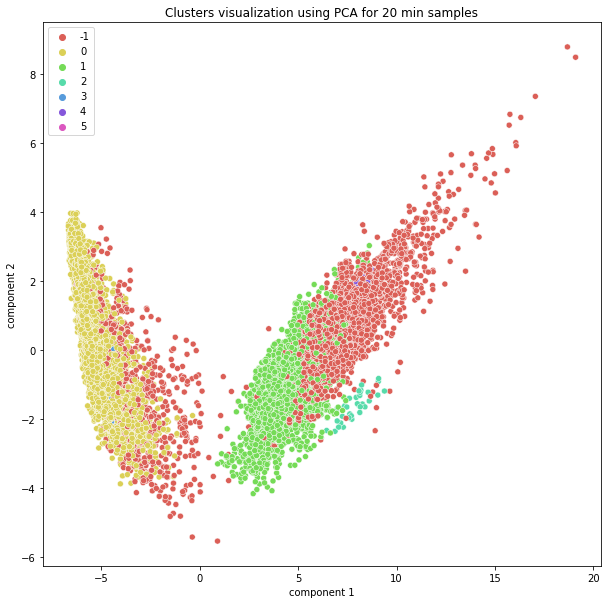

In [ ]:
# # using already calculated PCA before
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
df = pd.DataFrame()
df["y"] = y_pred_20
df["component 1"] = principalDf['principal component 1']
df["component 2"] = principalDf['principal component 2']
n = len(np.unique(DBSCAN_cluster_20.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using PCA for 20 min samples")

[Text(0.5, 1.0, 'Clusters visualization using PCA for 40 min samples')]

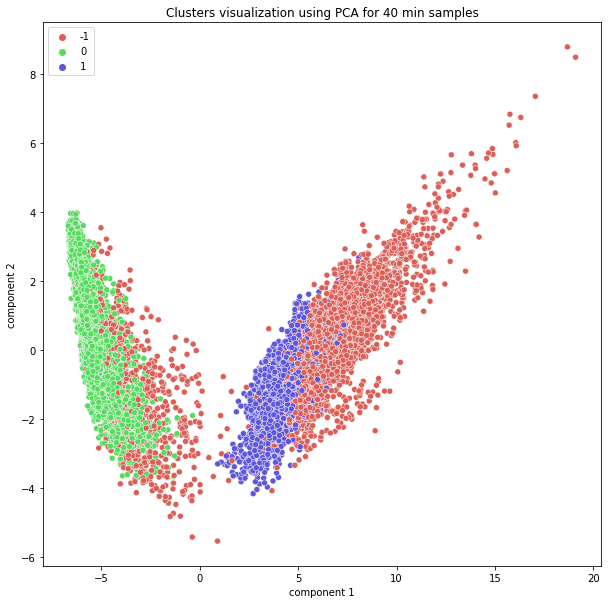

In [ ]:
# # using already calculated PCA before
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
df = pd.DataFrame()
df["y"] = y_pred_40
df["component 1"] = principalDf['principal component 1']
df["component 2"] = principalDf['principal component 2']
n = len(np.unique(DBSCAN_cluster_40.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using PCA for 40 min samples")

[Text(0.5, 1.0, 'Clusters visualization using UMAP for 20 min samples')]

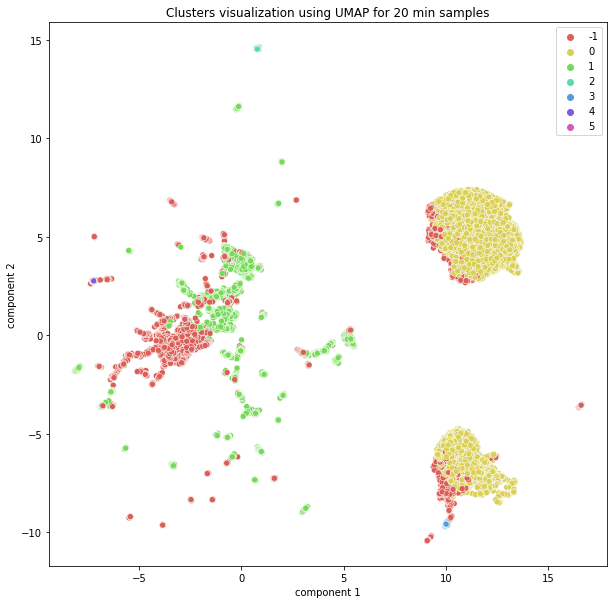

In [ ]:
# # using already calculated UMAP before
# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(X)

df = pd.DataFrame()
df["y"] = y_pred_20
df["component 1"] = embedding[:,0]
df["component 2"] = embedding[:,1]
n = len(np.unique(DBSCAN_cluster_20.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using UMAP for 20 min samples") 

[Text(0.5, 1.0, 'Clusters visualization using UMAP for 40 min samples')]

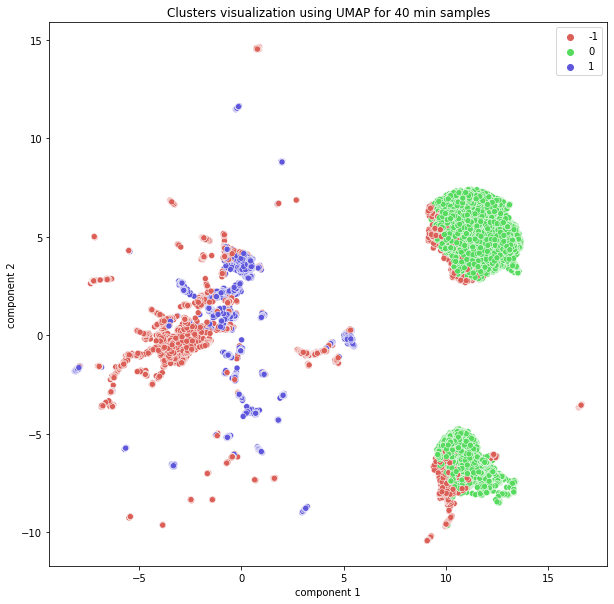

In [ ]:
# # using already calculated UMAP before
# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(X)

df = pd.DataFrame()
df["y"] = y_pred_40
df["component 1"] = embedding[:,0]
df["component 2"] = embedding[:,1]
n = len(np.unique(DBSCAN_cluster_40.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using UMAP for 40 min samples") 

[Text(0.5, 1.0, 'Clusters visualization using T-SNE for 20 min samples')]

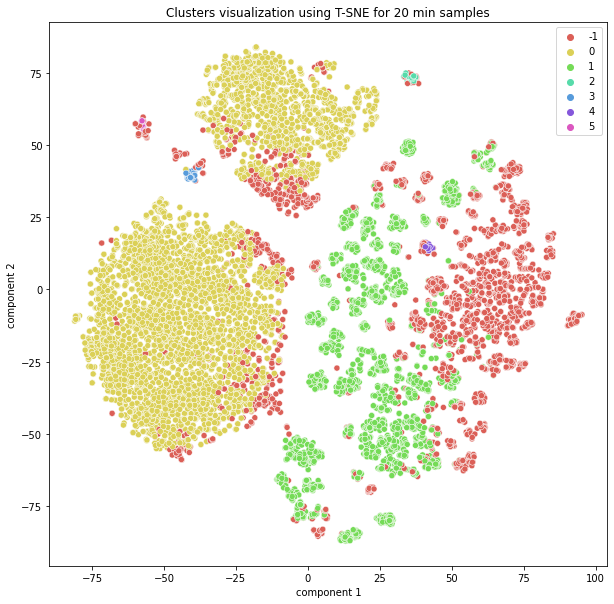

In [ ]:
# # using already calculated tsne before
# tsne = TSNE(n_components=2, verbose=1, random_state=42)
# z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = y_pred_20
df["component 1"] = z[:,0]
df["component 2"] = z[:,1]
n = len(np.unique(DBSCAN_cluster_20.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using T-SNE for 20 min samples") 

[Text(0.5, 1.0, 'Clusters visualization using T-SNE for 40 min samples')]

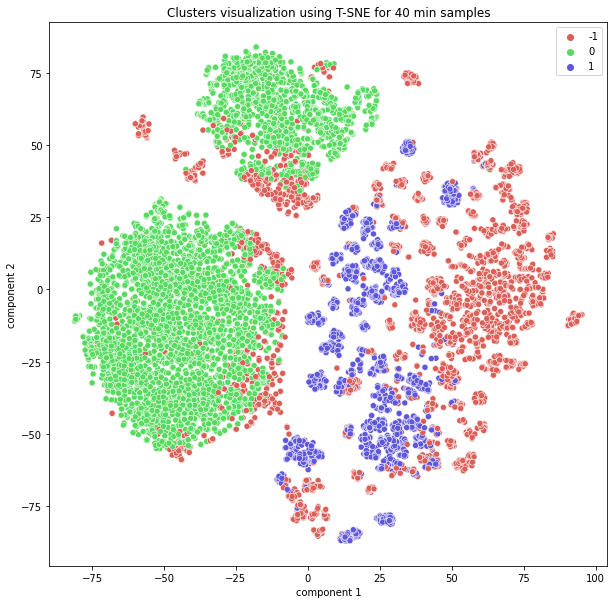

In [ ]:
# # using already calculated tsne before
# tsne = TSNE(n_components=2, verbose=1, random_state=42)
# z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = y_pred_40
df["component 1"] = z[:,0]
df["component 2"] = z[:,1]
n = len(np.unique(DBSCAN_cluster_40.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using T-SNE for 40 min samples") 

## **Dimensionality reduction clustering**

Let's try to improve results and speed up calculations using dimensionality reduction technique

### **PCA dimensionality reduction clustering**

First let's perform it using PCA:

In [ ]:
pcaDR = PCA(n_components=100)
data_pca_100 = pcaDR.fit_transform(X)

Epsilon is in same ranges:

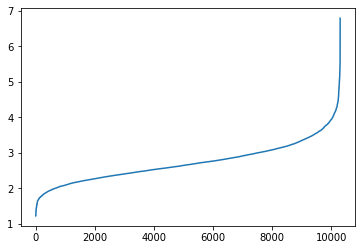

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data_pca_100)
distances, indices = neighbors_fit.kneighbors(data_pca_100)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

3.3515258352273705


<Figure size 360x360 with 0 Axes>

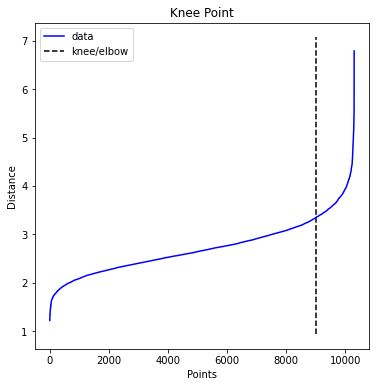

In [ ]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Number of min samples equal to 20 is still the best (calculations are omitted)

In [ ]:
DBSCAN_cluster_pca_100 = DBSCAN(eps=4, min_samples=20).fit(data_pca_100)
y_pred_pca_100 = DBSCAN_cluster_pca_100.fit_predict(data_pca_100)
d_b_score_pca_100 = davies_bouldin_score(data_pca_100, y_pred_pca_100)
s_dbw_score_pca_100 = SD(data_pca_100, y_pred_pca_100, metric='euclidean')

print (" Number of features", 100)
print (" Min number of samples", 20)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_pca_100, "\n S_Dbw score: ", s_dbw_score_pca_100)
print(" Classes: ", np.unique(DBSCAN_cluster_pca_100.labels_))
unique, counts = np.unique(y_pred_pca_100, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 100
 Min number of samples 20
 Lower is better
 Davies bouldin score:  3.3284742653104415 
 S_Dbw score:  1.0629754042573698
 Classes:  [-1  0  1  2  3]
 Classes counts:  [1100 5161 3990   19   29]


In [ ]:
pcaDR = PCA(n_components=50)
data_pca_50 = pcaDR.fit_transform(X)

DBSCAN_cluster_pca_50 = DBSCAN(eps=4, min_samples=40).fit(data_pca_50)
y_pred_pca_50 = DBSCAN_cluster_pca_50.fit_predict(data_pca_50)
d_b_score_pca_50 = davies_bouldin_score(data_pca_50, y_pred_pca_50)
s_dbw_score_pca_50 = SD(data_pca_50, y_pred_pca_50, metric='euclidean')

print (" Number of features", 50)
print (" Min number of samples", 40)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_pca_50, "\n S_Dbw score: ", s_dbw_score_pca_50)
print(" Classes: ", np.unique(DBSCAN_cluster_pca_50.labels_))
unique, counts = np.unique(y_pred_pca_50, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 50
 Min number of samples 40
 Lower is better
 Davies bouldin score:  3.17847460779941 
 S_Dbw score:  1.0617234440792491
 Classes:  [-1  0  1  2]
 Classes counts:  [ 369 5461 4419   50]


In [ ]:
pcaDR = PCA(n_components=20)
data_pca_20 = pcaDR.fit_transform(X)

DBSCAN_cluster_pca_20 = DBSCAN(eps=4, min_samples=40).fit(data_pca_20)
y_pred_pca_20 = DBSCAN_cluster_pca_20.fit_predict(data_pca_20)
d_b_score_pca_20 = davies_bouldin_score(data_pca_20, y_pred_pca_20)
s_dbw_score_pca_20 = SD(data_pca_20, y_pred_pca_20, metric='euclidean')

print (" Number of features", 20)
print (" Min number of samples", 40)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_pca_20, "\n S_Dbw score: ", s_dbw_score_pca_20)
print(" Classes: ", np.unique(DBSCAN_cluster_pca_20.labels_))
unique, counts = np.unique(y_pred_pca_20, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 20
 Min number of samples 40
 Lower is better
 Davies bouldin score:  1.105726793813015 
 S_Dbw score:  1.2241680000962456
 Classes:  [-1  0]
 Classes counts:  [   39 10260]


### **UMAP dimentionality reduction clustering**

Number of min samples and epsilon were chosen 4 and 100 for all n of umap components as the best ones based on scores and number of outliers, calculations are omitted

In [ ]:
reducer_umap = umap.UMAP(n_components=100, random_state=42)
data_umap = reducer_umap.fit_transform(X)

DBSCAN_cluster_umap = DBSCAN(eps=3, min_samples=1200).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 100)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 100
 Min number of samples 100
 Lower is better
 Davies bouldin score:  1.966329548220171 
 S_Dbw score:  0.762646513625624
 Classes:  [-1  0  1  2]
 Classes counts:  [1307 3674 1898 3420]


In [ ]:
DBSCAN_cluster_umap = DBSCAN(eps=3.351, min_samples=100).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 100)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 100
 Min number of samples 100
 Lower is better
 Davies bouldin score:  2.229804293255786 
 S_Dbw score:  0.8128304151576732
 Classes:  [-1  0  1  2]
 Classes counts:  [ 880 3674 1898 3847]


In [ ]:
reducer_umap = umap.UMAP(n_components=50, random_state=42)
data_umap = reducer_umap.fit_transform(X)

DBSCAN_cluster_umap = DBSCAN(eps=3, min_samples=500).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 50)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 50
 Min number of samples 100
 Lower is better
 Davies bouldin score:  1.947285678119104 
 S_Dbw score:  0.7343649920306059
 Classes:  [-1  0  1  2]
 Classes counts:  [1196 3674 1898 3531]


In [ ]:
reducer_umap = umap.UMAP(n_components=20, random_state=42)
data_umap = reducer_umap.fit_transform(X)

DBSCAN_cluster_umap = DBSCAN(eps=3.2, min_samples=1200).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 20)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 20
 Min number of samples 100
 Lower is better
 Davies bouldin score:  1.8521737987291558 
 S_Dbw score:  0.7115209822567516
 Classes:  [-1  0  1  2]
 Classes counts:  [1286 3673 1898 3442]


In [ ]:
reducer_umap = umap.UMAP(n_components=10, random_state=42)
data_umap = reducer_umap.fit_transform(X)

DBSCAN_cluster_umap = DBSCAN(eps=3, min_samples=500).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 10)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

 Number of features 10
 Min number of samples 100
 Lower is better
 Davies bouldin score:  1.6837523385695192 
 S_Dbw score:  0.7322980300247881
 Classes:  [-1  0  1  2]
 Classes counts:  [1079 3673 1898 3649]


In [ ]:
reducer_umap = umap.UMAP(n_components=2, random_state=42)
data_umap = reducer_umap.fit_transform(X)

DBSCAN_cluster_umap = DBSCAN(eps=0.1, min_samples=500).fit(data_umap)
y_pred_umap = DBSCAN_cluster_umap.fit_predict(data_umap)
d_b_score_umap = davies_bouldin_score(data_umap, y_pred_umap)
s_dbw_score_umap = SD(data_umap, y_pred_umap, metric='euclidean')

print (" Number of features", 2)
print (" Min number of samples", 100)
print(" Lower is better\n", "Davies bouldin score: ", d_b_score_umap, "\n S_Dbw score: ", s_dbw_score_umap)
print(" Classes: ", np.unique(DBSCAN_cluster_umap.labels_))
unique, counts = np.unique(y_pred_umap, return_counts=True)
print(" Classes counts: ", counts)

ValueError: ignored

### **PCA and UMAP t-SNE visualization**

[Text(0.5, 1.0, 'Clusters visualization using T-SNE for PCA dimentionality reduction')]

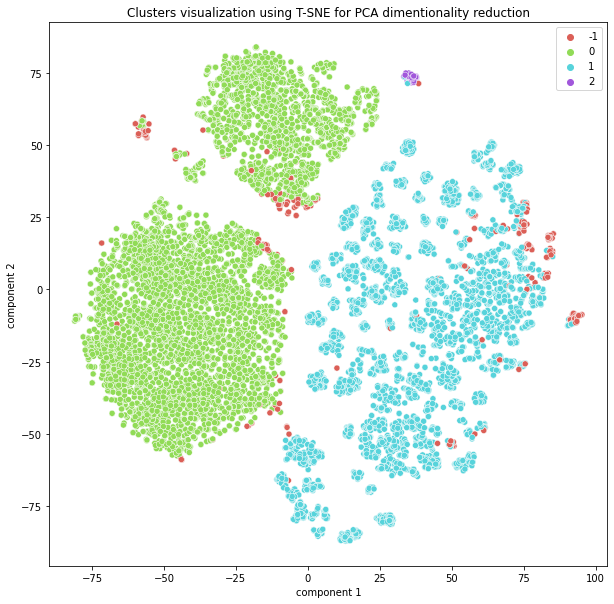

In [ ]:
# # using already calculated tsne before
# tsne = TSNE(n_components=2, verbose=1, random_state=42)
# z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = y_pred_pca_50
df["component 1"] = z[:,0]
df["component 2"] = z[:,1]
n = len(np.unique(DBSCAN_cluster_pca_50.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using T-SNE for PCA dimentionality reduction") 

[Text(0.5, 1.0, 'Clusters visualization using T-SNE UMAP dimentionality reduction')]

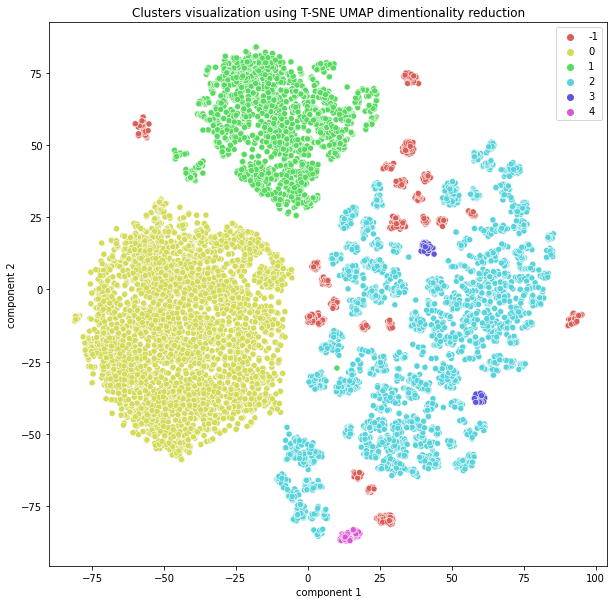

In [ ]:
# # using already calculated tsne before
# tsne = TSNE(n_components=2, verbose=1, random_state=42)
# z = tsne.fit_transform(X) 

df = pd.DataFrame()
df["y"] = y_pred_umap
df["component 1"] = z[:,0]
df["component 2"] = z[:,1]
n = len(np.unique(DBSCAN_cluster_umap.labels_))

fig = plt.figure(figsize=(10,10))
sns.scatterplot(x="component 1", y="component 2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n),
                data=df).set(title="Clusters visualization using T-SNE UMAP dimentionality reduction") 